In [58]:
# ============================================================================
# EE200: Signals, Systems and Networks
# Code for Question 1: Frequency Mixer
# ============================================================================


In [59]:
# ============================================================================
# --- CONFIGURATION AND SETUP ---
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import fft2, fftshift, ifft2, ifftshift
from matplotlib.gridspec import GridSpec
import os

# Input file paths
IMAGE_CAT_PATH = 'cat_gray.jpg'
IMAGE_DOG_PATH = 'dog_gray.jpg'

# Output directory for all generated files
OUTPUT_DIR = 'q1_final_submission_outputs'

# --- Parameters for the Hybrid Image ---
# The cutoff frequency that produces the best visual illusion for the main hybrid image.
BEST_HYBRID_CUTOFF = 13

# To demonstrate the effect of changing the filter parameters.
GRID_CUTOFF_FREQUENCIES = [10, 15, 20, 25]

# Create the output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"All outputs for Question 1 will be saved in: '{OUTPUT_DIR}/'")


All outputs for Question 1 will be saved in: 'q1_final_submission_outputs/'



PART 1: Analyzing the 2D Fourier Transform of a Single Image...


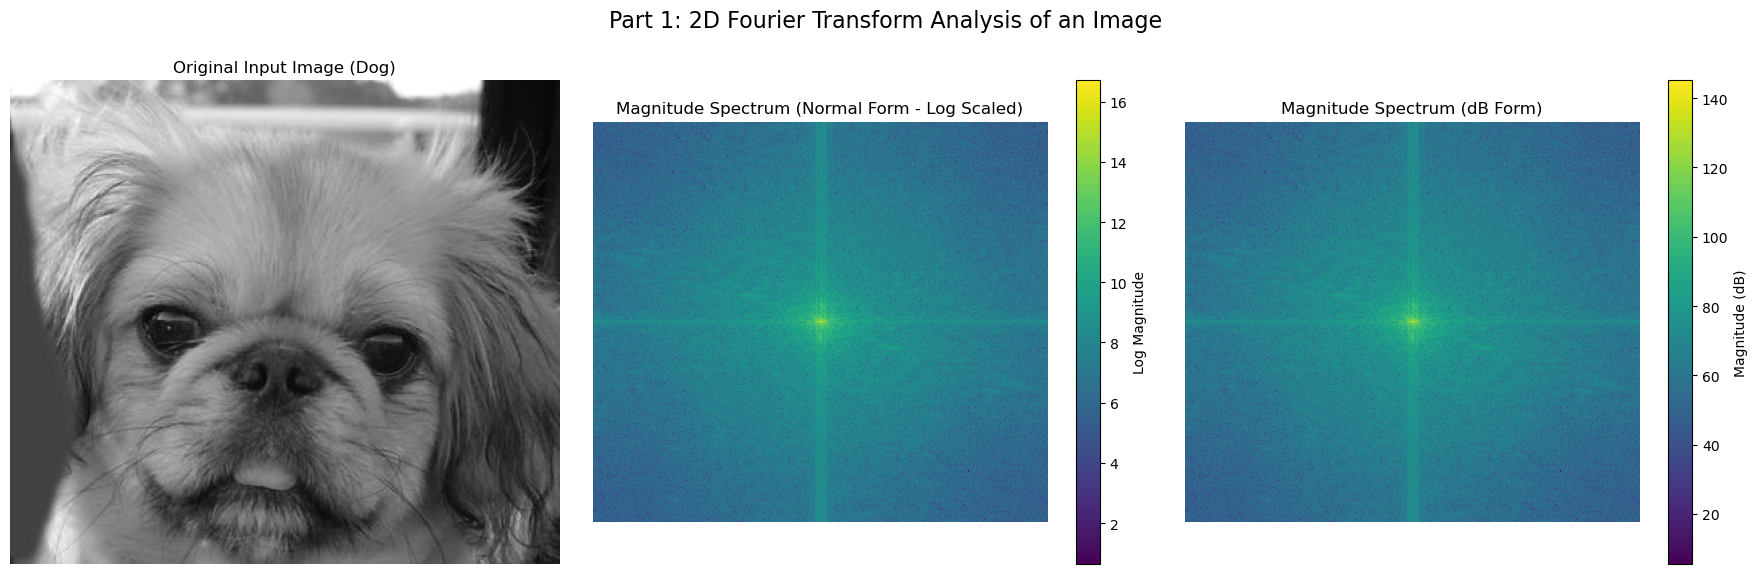

In [60]:
# ============================================================================
# --- PART 1: 2D FOURIER TRANSFORM OF A SINGLE IMAGE ---
# ============================================================================

print("\nPART 1: Analyzing the 2D Fourier Transform of a Single Image...")

try:
    # We'll use the dog image for this initial analysis
    img_single_pil = Image.open(IMAGE_DOG_PATH).convert('L')
except FileNotFoundError:
    print(f"Error: '{IMAGE_DOG_PATH}' not found. Please check the file path.")
    # Fallback to a dummy image to prevent script crash
    img_single_pil = Image.fromarray(np.random.randint(0, 255, (400, 400), dtype=np.uint8))

img_single_array = np.array(img_single_pil, dtype=float)
F_single_shifted = fftshift(fft2(img_single_array))

# Calculate spectra in normal and dB forms
magnitude_spectrum_normal = np.abs(F_single_shifted)
magnitude_spectrum_db = 20 * np.log10(magnitude_spectrum_normal + 1)

# Create and save the analysis plot
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6))
fig1.suptitle('Part 1: 2D Fourier Transform Analysis of an Image', fontsize=16)

axes1[0].imshow(img_single_array, cmap='gray'); 
axes1[0].set_title('Original Input Image (Dog)'); 
axes1[0].axis('off')

im1 = axes1[1].imshow(np.log(magnitude_spectrum_normal + 1), cmap='viridis'); 
axes1[1].set_title('Magnitude Spectrum (Normal Form - Log Scaled)'); 
axes1[1].axis('off'); fig1.colorbar(im1, ax=axes1[1], label='Log Magnitude')

im2 = axes1[2].imshow(magnitude_spectrum_db, cmap='viridis'); 
axes1[2].set_title('Magnitude Spectrum (dB Form)'); 
axes1[2].axis('off'); fig1.colorbar(im2, ax=axes1[2], label='Magnitude (dB)')

fig1.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(os.path.join(OUTPUT_DIR, 'q1_part1_spectra_analysis.png'))
plt.show()



PART 2: Analyzing the Effect of Rotation on the Fourier Spectrum...


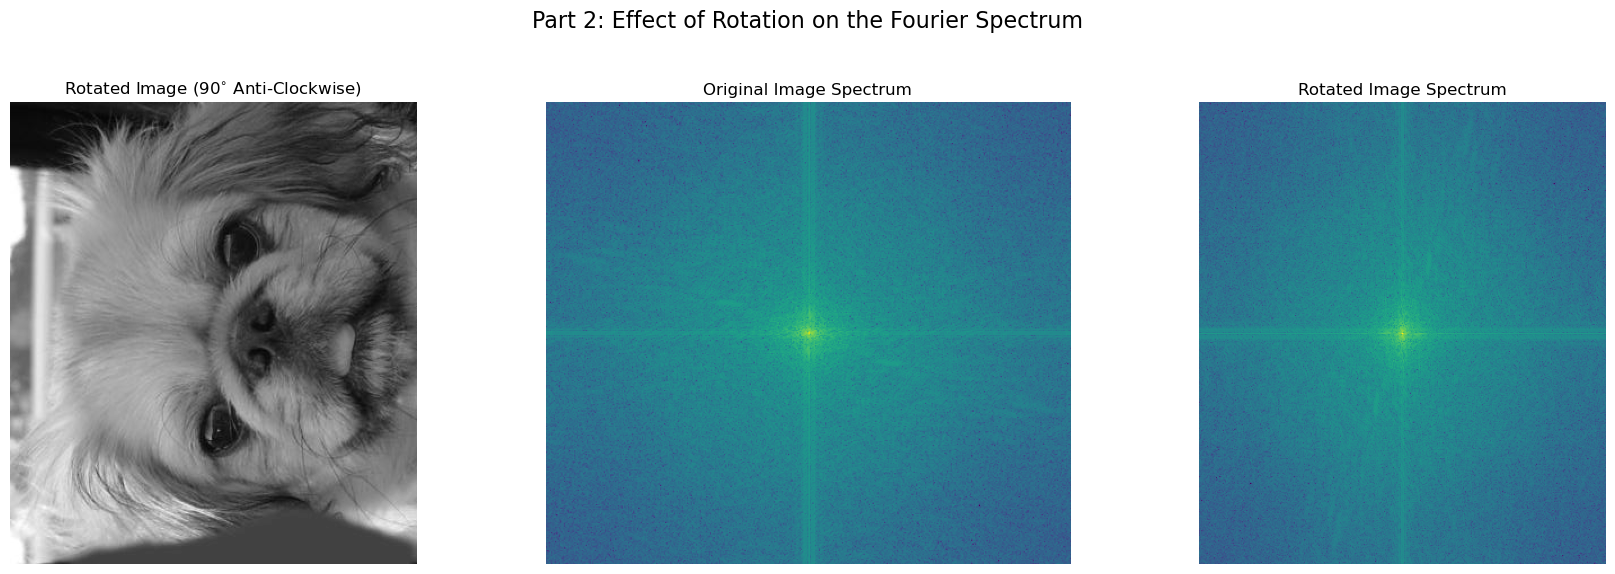

In [61]:
# ============================================================================
# --- PART 2: ROTATION ANALYSIS ---
# ============================================================================

print("\nPART 2: Analyzing the Effect of Rotation on the Fourier Spectrum...")

img_rotated = img_single_pil.rotate(90, expand=True)
img_rotated_array = np.array(img_rotated, dtype=float)
magnitude_spectrum_rotated = np.log(np.abs(fftshift(fft2(img_rotated_array))) + 1)

# Create and save the rotation analysis plot
fig2, axes2 = plt.subplots(1, 3, figsize=(18, 6))
fig2.suptitle('Part 2: Effect of Rotation on the Fourier Spectrum', fontsize=16)

axes2[0].imshow(img_rotated_array, cmap='gray'); 
axes2[0].set_title('Rotated Image (90$^{\circ}$ Anti-Clockwise)'); 
axes2[0].axis('off')

axes2[1].imshow(np.log(magnitude_spectrum_normal + 1), cmap='viridis'); 
axes2[1].set_title('Original Image Spectrum'); 
axes2[1].axis('off')

axes2[2].imshow(magnitude_spectrum_rotated, cmap='viridis'); 
axes2[2].set_title('Rotated Image Spectrum'); 
axes2[2].axis('off')

fig2.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(os.path.join(OUTPUT_DIR, 'q1_part2_rotation_analysis.png'))
plt.show()



PART 3: Creating and Visualizing the Hybrid Image...
--> Generating component images for the multi-level grid...
--> Creating final hybrid and detailed system overview for chosen cutoff = 13...


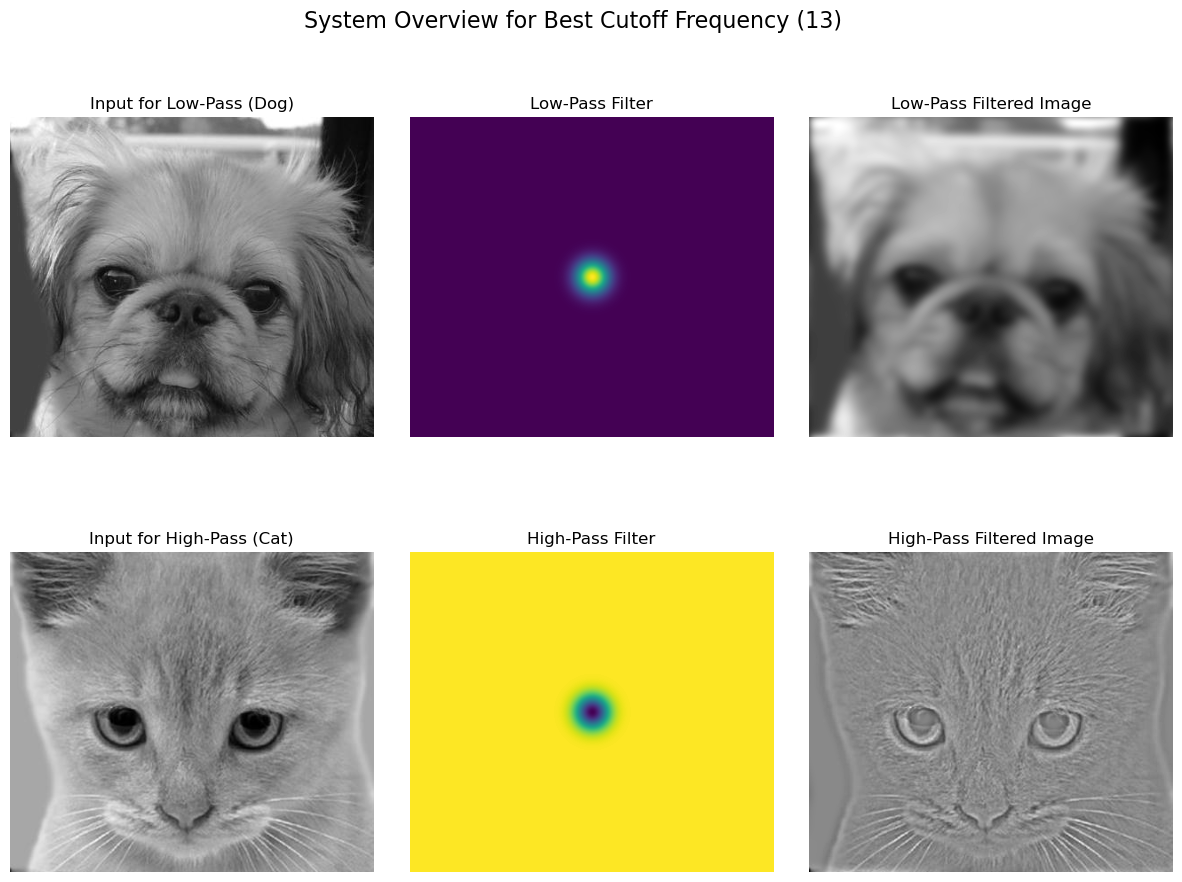

--> Assembling the final composite visualization figure...


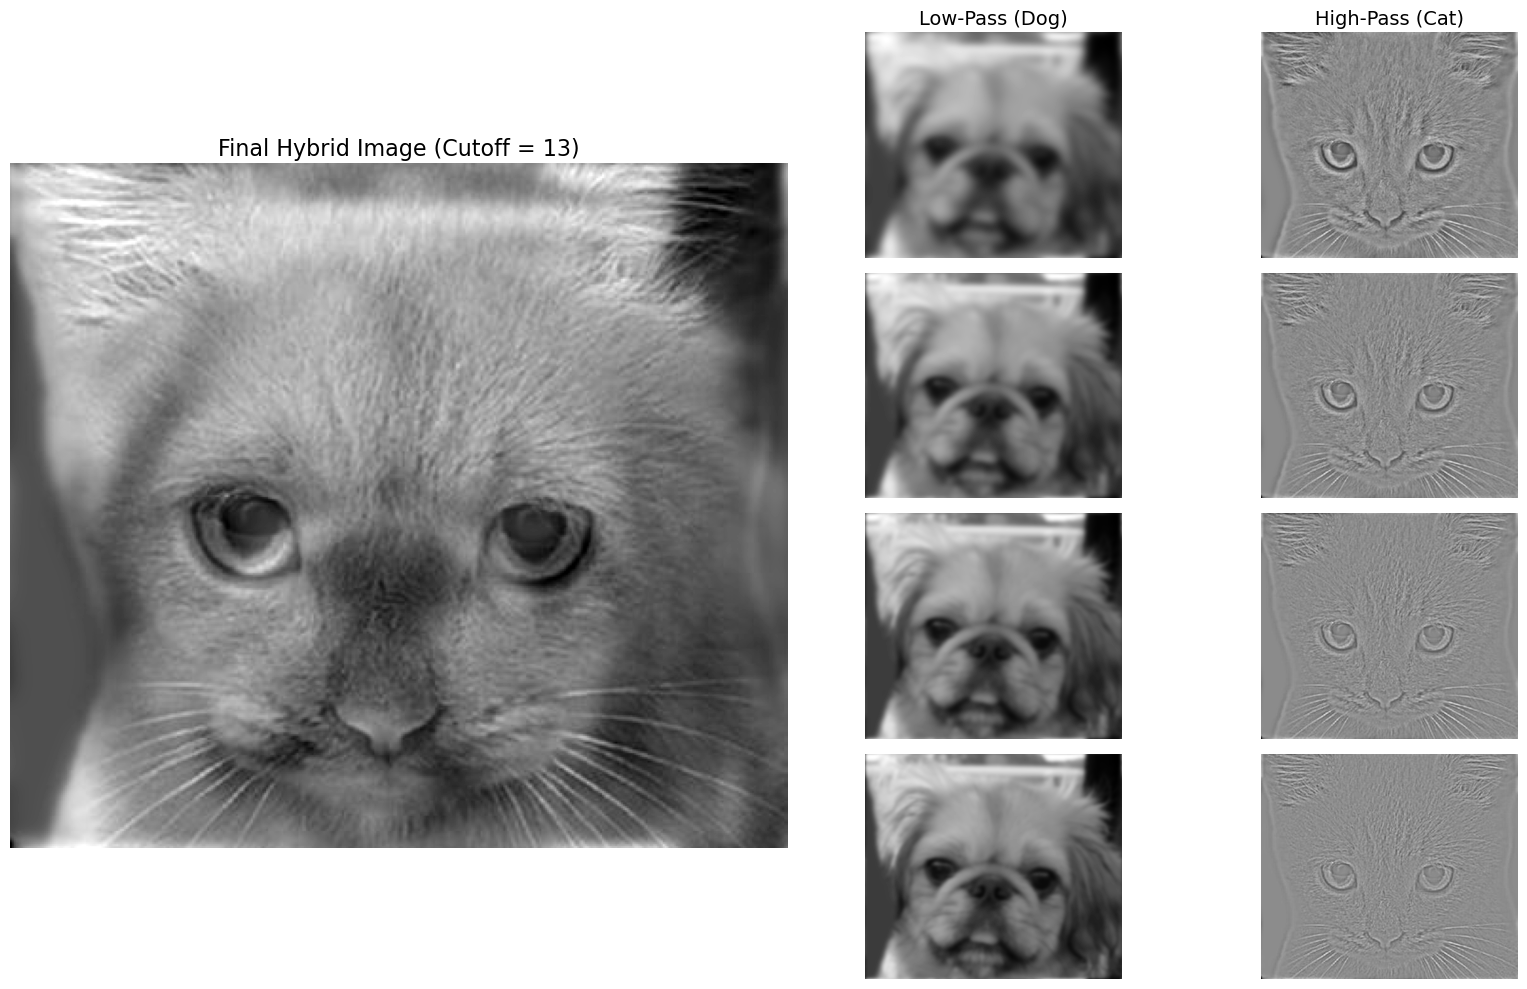

In [62]:
# ============================================================================
# --- PART 3: CREATIVE FUSION (CAT-HIGH, DOG-LOW) ---
# ============================================================================

print("\nPART 3: Creating and Visualizing the Hybrid Image...")

try:
    img_high_pil = Image.open(IMAGE_CAT_PATH).convert('L') # Cat provides high frequencies
    img_low_pil = Image.open(IMAGE_DOG_PATH).convert('L')  # Dog provides low frequencies
except FileNotFoundError: exit("Error: Could not find Cat or Dog image. Aborting.")

if img_high_pil.size != img_low_pil.size: img_high_pil = img_high_pil.resize(img_low_pil.size)

arr_high = np.array(img_high_pil, dtype=float); arr_low = np.array(img_low_pil, dtype=float)
F_high_shifted = fftshift(fft2(arr_high)); F_low_shifted = fftshift(fft2(arr_low))

# --- A) Generate components for the multi-level grid visualization ---
low_pass_components, high_pass_components = [], []
print("--> Generating component images for the multi-level grid...")
for cutoff in GRID_CUTOFF_FREQUENCIES:
    rows, cols = arr_low.shape; crow, ccol = rows // 2, cols // 2
    x, y = np.meshgrid(np.arange(cols), np.arange(rows)); dist = np.sqrt((x - ccol)**2 + (y - crow)**2)
    lpf = np.exp(-(dist**2) / (2 * cutoff**2)); hpf = 1.0 - lpf
    F_low_f = F_low_shifted * lpf; F_high_f = F_high_shifted * hpf
    low_pass_components.append(np.clip(np.real(ifft2(ifftshift(F_low_f))), 0, 255))
    high_pass_components.append(np.clip(np.real(ifft2(ifftshift(F_high_f))) + 128, 0, 255))

# --- B) Create the final hybrid and the detailed system overview for the BEST cutoff ---
print(f"--> Creating final hybrid and detailed system overview for chosen cutoff = {BEST_HYBRID_CUTOFF}...")
rows, cols = arr_low.shape; crow, ccol = rows // 2, cols // 2
x, y = np.meshgrid(np.arange(cols), np.arange(rows)); dist = np.sqrt((x - ccol)**2 + (y - crow)**2)
final_lpf = np.exp(-(dist**2) / (2 * BEST_HYBRID_CUTOFF**2)); final_hpf = 1.0 - final_lpf

F_final_low = F_low_shifted * final_lpf; F_final_high = F_high_shifted * final_hpf
F_final_hybrid = F_final_low + F_final_high
final_hybrid_image = np.clip(np.real(ifft2(ifftshift(F_final_hybrid))), 0, 255)
Image.fromarray(final_hybrid_image.astype(np.uint8)).save(os.path.join(OUTPUT_DIR, 'Cat-Dog_Hybrid_Final.png'))

final_low_pass_img = np.clip(np.real(ifft2(ifftshift(F_final_low))), 0, 255)
final_high_pass_display_img = np.clip(np.real(ifft2(ifftshift(F_final_high))) + 128, 0, 255)

# --- Plot A: The Detailed System Overview for Best Cutoff ---
fig_overview, axes_overview = plt.subplots(2, 3, figsize=(15, 10))
fig_overview.suptitle(f'System Overview for Best Cutoff Frequency ({BEST_HYBRID_CUTOFF})', fontsize=16)

axes_overview[0, 0].imshow(arr_low, cmap='gray'); 
axes_overview[0, 0].set_title('Input for Low-Pass (Dog)');

axes_overview[0, 1].imshow(final_lpf, cmap='viridis'); \
axes_overview[0, 1].set_title('Low-Pass Filter');

axes_overview[0, 2].imshow(final_low_pass_img, cmap='gray'); 
axes_overview[0, 2].set_title('Low-Pass Filtered Image');

axes_overview[1, 0].imshow(arr_high, cmap='gray'); 
axes_overview[1, 0].set_title('Input for High-Pass (Cat)');

axes_overview[1, 1].imshow(final_hpf, cmap='viridis'); 
axes_overview[1, 1].set_title('High-Pass Filter');

axes_overview[1, 2].imshow(final_high_pass_display_img, cmap='gray'); 
axes_overview[1, 2].set_title('High-Pass Filtered Image');

for ax in axes_overview.flat: ax.axis('off')

fig_overview.subplots_adjust(hspace=0.3, wspace=0.1) 
plt.savefig(os.path.join(OUTPUT_DIR, 'q1_part3_system_overview.png'))
plt.show()

# --- Plot B: The Final Composite Visualization ---
print("--> Assembling the final composite visualization figure...")
fig_composite = plt.figure(figsize=(16, 10))
gs = GridSpec(len(GRID_CUTOFF_FREQUENCIES), 4, figure=fig_composite)

ax_main = fig_composite.add_subplot(gs[:, 0:2]); 
ax_main.imshow(final_hybrid_image, cmap='gray');
ax_main.set_title(f'Final Hybrid Image (Cutoff = {BEST_HYBRID_CUTOFF})', fontsize=16); 
ax_main.axis('off')

for i in range(len(GRID_CUTOFF_FREQUENCIES)):
    ax_lp = fig_composite.add_subplot(gs[i, 2]); ax_lp.imshow(low_pass_components[i], cmap='gray'); ax_lp.axis('off')
    if i == 0: ax_lp.set_title('Low-Pass (Dog)', fontsize=14)
    ax_hp = fig_composite.add_subplot(gs[i, 3]); ax_hp.imshow(high_pass_components[i], cmap='gray'); ax_hp.axis('off')
    if i == 0: ax_hp.set_title('High-Pass (Cat)', fontsize=14)

fig_composite.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'q1_part3_composite_visualization.png'))
plt.show()


In [63]:
# ============================================================================
# --- END ---
# ============================================================================
